In [1]:
import numpy as np

#from linear_regression import LinearRegression as MyLinearRegression
from sklearn.linear_model import LinearRegression, Ridge, Lasso

import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.model_selection import train_test_split

from sklearn.datasets import make_regression

from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
RANDOM_STATE = 42

Сгенерируем данные для регрессии:

In [3]:
n_samples = 1000
n_outliers = 50

X, y, coef = make_regression(
    n_samples=n_samples, n_features=1,
    n_informative=1, noise=10,
    coef=True, random_state=RANDOM_STATE
)

# Add outlier data
np.random.seed(RANDOM_STATE)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

Разобьем данные на тренировочную и обучающую выборки:

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=RANDOM_STATE
)

Посмотрим на данные:

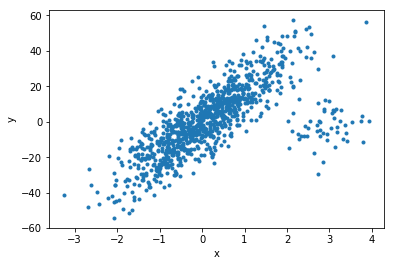

In [5]:
plt.plot(X, y, ".");
plt.xlabel("x");
plt.ylabel("y");

Обучим линейную модель и обучим ее на тренировочных данных:Ъ

In [6]:
linear_regression_model = LinearRegression()

linear_regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Сделаем предикт на тестовых данных:

In [7]:
y_hat = linear_regression_model.predict(X_test)

Посмотрим на значения метрик:

In [8]:
print("MAE:", mean_absolute_error(y_test, y_hat))
print("MSE:", mean_squared_error(y_test, y_hat))
print("R^2 score:", r2_score(y_test, y_hat))

MAE: 9.940362029807721
MSE: 173.1929838913916
R^2 score: 0.47263462857304817


Посмотрим на веса обученной модели:

In [9]:
print(linear_regression_model.coef_)
print(linear_regression_model.intercept_)

[11.3272569]
-1.3555932515073648


Визуализируем:

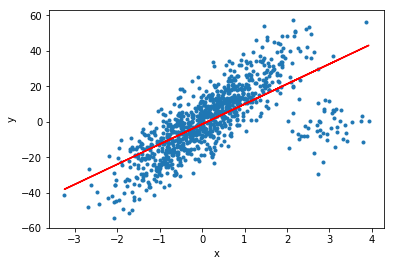

In [10]:
plt.plot(X, y, ".");
plt.plot(X, X * linear_regression_model.coef_ + linear_regression_model.intercept_, "r")
plt.xlabel("x");
plt.ylabel("y");

---

In [11]:
# TODO: выполните то же самое с написанной вами моделью:
# 1. обучите ее на (X_train, y_train)
#   * попробуйте обучать с регуляризацией и без
#   * пробуйте различные гиперпараметры (шаг градиента, коэффицент регуляризации)
# 2. оцените кач-во на X_test, используя все написанные вами метрики
# 3. сравните значения метрик с значениями метрик из sklearn.metrics
# 4. визуализируйте y = k * x + b, где k и b -- bias и вес вашей модели

In [12]:
from linear_regression import LinearRegression as MyLinearRegression

In [13]:
n_samples = 1000
n_outliers = 50

X, y, coef = make_regression(
    n_samples=n_samples, n_features=1,
    n_informative=1, noise=10,
    coef=True, random_state=RANDOM_STATE
)

# Add outlier data
np.random.seed(RANDOM_STATE)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=RANDOM_STATE
)

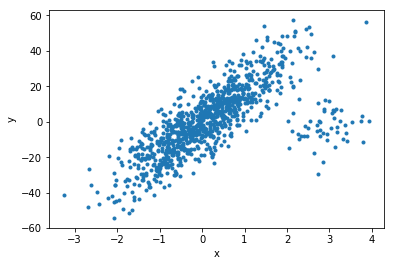

In [15]:
plt.plot(X, y, ".");
plt.xlabel("x");
plt.ylabel("y");

In [16]:
print(X_train.shape)
print (y_train.shape)

(670, 1)
(670,)


In [17]:
from linear_regression import LinearRegression as MyLinearRegression

In [18]:
linear_regression_model = MyLinearRegression(regularization = None)
import numpy as np
linear_regression_model.fit(X_train, y_train.reshape(-1,1))

In [19]:
y_hat = linear_regression_model.predict(X_test)

In [20]:
y_hat

array([[ 1.58958845e+01],
       [ 2.63216569e+00],
       [ 1.99622447e+01],
       [-1.25209888e+01],
       [-8.67937453e+00],
       [ 8.70798072e-01],
       [ 7.21887578e+00],
       [-7.20087195e+00],
       [-7.64752571e+00],
       [-1.66662298e+01],
       [-1.27113213e+01],
       [ 5.69947646e+00],
       [-6.05959168e+00],
       [ 1.70918618e+01],
       [-1.69605613e+01],
       [ 1.31323126e+00],
       [ 5.68769664e+00],
       [-5.44428501e+00],
       [-2.06408901e+01],
       [ 5.50872869e+00],
       [ 6.14441249e+00],
       [-1.61314207e+01],
       [-7.36462094e+00],
       [ 1.18271980e+00],
       [-7.87588761e+00],
       [-1.89602341e+00],
       [-5.14451469e+00],
       [ 1.59697423e+01],
       [ 1.56802524e+01],
       [-1.40945016e+01],
       [ 2.77930535e+01],
       [ 3.32741614e+00],
       [-1.55318776e+01],
       [ 6.36894118e+00],
       [-6.02095561e+00],
       [-1.33363671e+01],
       [ 3.46359773e+00],
       [-5.60121762e+00],
       [ 1.9

In [21]:
print("MAE:", mean_absolute_error(y_test, y_hat))
print("MSE:", mean_squared_error(y_test, y_hat))
print("R^2 score:", r2_score(y_test, y_hat)) # и тут я охренел

MAE: 9.940396489004856
MSE: 173.19276796546998
R^2 score: 0.47263528605842264


In [22]:
print(linear_regression_model.get_weights()) 
# результаты весов не совпадают с sklearn, о чем я долго говорил с Амиром
# но между ними есть связь:
#  12.98/std(x) = 12.98/1.146 = 11.33 
#  0.65 - 12.98*mean(x)/std(x) = 0.65 - 12.98*0.177/1.146 = -1.35

[[ 0.65119205]
 [12.98443475]]


In [23]:
linear_regression_model.mean_x

array([0.17716707])

In [24]:
linear_regression_model.std_x

array([1.14631814])

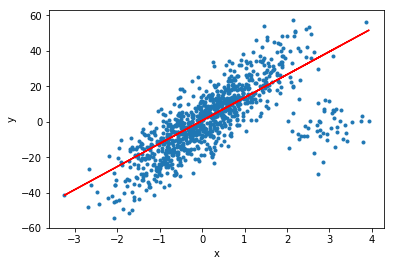

In [25]:
plt.plot(X, y, ".");
plt.plot(X, X * linear_regression_model.get_weights()[1] + linear_regression_model.get_weights()[0], "r")
plt.xlabel("x");
plt.ylabel("y");

In [26]:
# Регуляризацию пробовал, вроде бы тенденция к уменьшению коэф-тов при росте альфы есть